# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Import citipy library - provides geo coordinates for all available cities with population over 500
from citipy import citipy

# Range of latitudes and longitudes -open interval
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
#This code gives us list of random cities

# Initialize two lists
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#numpy.random.uniform(low=0.0, high=1.0, size=None) - draws samples from uniform distribution- any value within half open interval (lat_range[0], lat_range[0]] is equally likely to be drawn
#lats creates a random list of latitudes
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)

#lngs creates a random list of longitudes
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Merges the above two lists using zip function-to create an object with lats and longs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# for loop looks at the lat_lng list
for lat_lng in lat_lngs:
    #using nearest_city function of citipy library 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [13]:
#cities

['hasaki',
 'bredasdorp',
 'avarua',
 'jamestown',
 'bluff',
 'papara',
 'carnarvon',
 'busselton',
 'georgetown',
 'safwah',
 'niort',
 'grand river south east',
 'pedernales',
 'cidreira',
 'cape town',
 'stange',
 'belushya guba',
 'attawapiskat',
 'yellowknife',
 'dikson',
 'victoria',
 'port elizabeth',
 'ushuaia',
 'vaini',
 'cruzeiro do sul',
 'mataura',
 'butaritari',
 'vikulovo',
 'taolanaro',
 'irece',
 'laguna',
 'punta arenas',
 'toamasina',
 'almaznyy',
 'thompson',
 'port alfred',
 'upernavik',
 'puerto ayora',
 'iwaki',
 'albany',
 'saskylakh',
 'rikitea',
 'toliary',
 'bonthe',
 'ukhta',
 'hobart',
 'maningrida',
 'iqaluit',
 'mahebourg',
 'moosomin',
 'saint-philippe',
 'scalloway',
 'caruray',
 'norman wells',
 'tiksi',
 'navadwip',
 'aksu',
 'hithadhoo',
 'sabzevar',
 'nyagan',
 'richards bay',
 'senneterre',
 'lorengau',
 'mountain home',
 'sogne',
 'artyk',
 'castro',
 'tura',
 'asmara',
 'rehoboth',
 'ondjiva',
 'longyearbyen',
 'dickson',
 'rawannawi',
 'bonavist

In [33]:
url="http://api.openweathermap.org/data/2.5/weather?"

#Standard units are in Kelvin hence conversion-https://openweathermap.org/weather-data
units="imperial"

#Build query url- base url+apikey+units
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [34]:
#cities=["New York", "London","Boslo Fake City","Moscow","Beijing"]

#declared variables to hold list objects
dt=[]
country=[]
lat=[]
lng=[]
cloud=[]
humidity=[]
temp_max=[]
windspeed=[]

#print(cities)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:

for city in cities:
    url= query_url + city
    time.sleep(1)
    try:
        response=requests.get(url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        temp_max.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]["all"])   
        humidity.append(response["main"]["humidity"])
        windspeed.append(response["wind"]["speed"])
    except KeyError:
        #print("City not found")
        lat.append(0)
        lng.append(0)
        country.append(city +" Not Found")
        dt.append("")
        temp_max.append(0)
        cloud.append(0)
        humidity.append(0)
        windspeed.append(0)

In [ ]:
#df=pd.DataFrame({'City': cities, 'Cloudiness (%)': cloud, 'Country': country, 'Date': dt, 'Humidity (%)': humidity, 'Lat': lat, 'Lon': lng, 'Max Temp (F)': temp_max, 'WindSpeed (mph)': windspeed})
#print(df)

In [70]:
# cleaned_df=df.loc[df["Lat"]!=0]
# cleaned_df

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lon,Max Temp (F),WindSpeed (mph)
0,hasaki,75,JP,1603149160,100,35.73,140.83,51.80,6.93
1,bredasdorp,100,ZA,1603149009,62,-34.53,20.04,59.00,8.05
2,avarua,10,CK,1603149174,78,-21.21,-159.78,78.80,6.93
3,jamestown,90,US,1603148855,100,42.10,-79.24,51.01,4.70
4,bluff,88,NZ,1603148928,84,-46.60,168.33,50.00,8.99
...,...,...,...,...,...,...,...,...,...
630,sur,4,OM,1603149844,43,22.57,59.53,78.93,10.07
631,galveston,1,US,1603149630,78,29.37,-94.97,80.60,13.87
632,yazoo city,1,US,1603149846,65,32.86,-90.41,78.80,4.38
634,nioro,9,GM,1603149848,62,13.35,-15.75,79.90,4.97


## Convert Raw Data to DataFrame
* Save as csv

In [ ]:
# Output File (CSV)
final_cities = "output_files/final_cities.csv"

In [16]:
df=pd.read_csv("output_files/final_cities.csv")
#df.head()
df.count()

Unnamed: 0         576
City               576
Cloudiness (%)     576
Country            570
Date               576
Humidity (%)       576
Lat                576
Lon                576
Max Temp (F)       576
WindSpeed (mph)    576
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [17]:
#Converts the column values of a dataframe to numeric type or list obj
x=pd.to_numeric(df['Lat'])

y=pd.to_numeric(df['Max Temp (F)'])

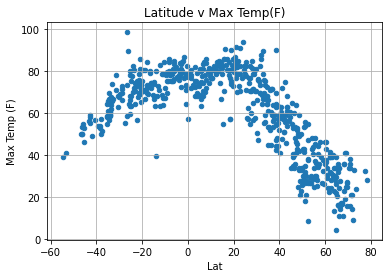

<Figure size 432x288 with 0 Axes>

In [25]:
#Scatter plot using pandas
df.plot(kind='scatter',x='Lat', y='Max Temp (F)', grid=True, title="Latitude v Max Temp(F)")
plt.show()

#saves figure to o/p files directory
plt.savefig(r"output_files\LatvMaxTemp.png")

In [ ]:
#From the above scatter plot cities with latitudes closer to the equator (0) seem to show higher max temps
#cities to the east of prime meridian(+ve latitudes) seem to show lower max temps, cities to the west of prime meridian(-ve latitudes) seem to show higher max temps.

### Latitude vs. Humidity Plot

In [78]:
#Converting dataframe columns to numeric
x=pd.to_numeric(df['Lat'])
y=pd.to_numeric(df['Humidity (%)'])

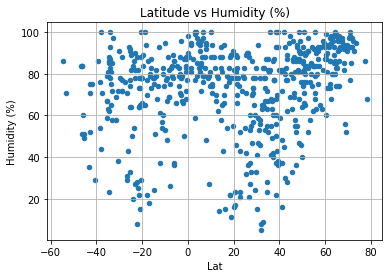

<Figure size 432x288 with 0 Axes>

In [26]:
df.plot(kind='scatter', x='Lat', y='Humidity (%)', grid=True, title='Latitude vs Humidity (%)')
plt.show()
plt.savefig(r"output_files\LatvHum.png")

### Latitude vs. Cloudiness Plot

In [20]:
#Converts dataframe columns to numeric so they can be passed as x, y params to generate scatter plots
df['Lat']=pd.to_numeric(df['Lat'])
df['Cloud']=pd.to_numeric(df['Cloudiness (%)'])

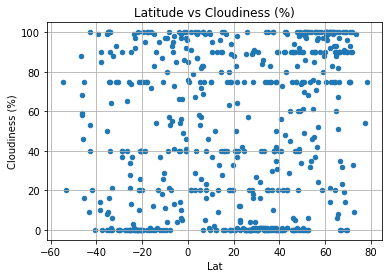

<Figure size 432x288 with 0 Axes>

In [27]:
df.plot(kind='scatter', x='Lat' , y='Cloudiness (%)', grid=True, title='Latitude vs Cloudiness (%)')
plt.show()
plt.savefig(r"output_files\LatvCloud.png")

### Latitude vs. Wind Speed Plot

In [64]:
df['Lat']=pd.to_numeric(df['Lat'])

df['Wind Speed']=pd.to_numeric(df['WindSpeed (mph)'])

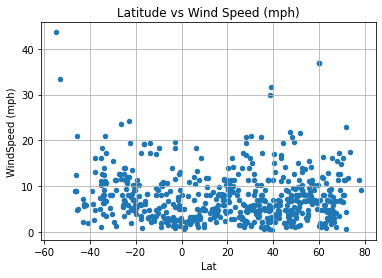

<Figure size 432x288 with 0 Axes>

In [28]:
df.plot.scatter(x='Lat', y='WindSpeed (mph)', grid=True, title='Latitude vs Wind Speed (mph)')
plt.show()
plt.savefig(r"output_files\LatvWindspeed.png")

## Linear Regression

### Write linear regression plot function (optional)

In [22]:
#new df for northern hemisphere sorted based on lat values
df_nh=df.loc[df["Lat"]>0]
#print(df_nh)
df_nh.count()

Unnamed: 0         394
City               394
Cloudiness (%)     394
Country            394
Date               394
Humidity (%)       394
Lat                394
Lon                394
Max Temp (F)       394
WindSpeed (mph)    394
Cloud              394
dtype: int64

In [23]:
#new df for southern hemisphere sorted based on lat values
df_sh=df.loc[df["Lat"]<0]
#print(df_sh)
#df_sh.dropna(how="any")
df_sh.count()

Unnamed: 0         182
City               182
Cloudiness (%)     182
Country            176
Date               182
Humidity (%)       182
Lat                182
Lon                182
Max Temp (F)       182
WindSpeed (mph)    182
Cloud              182
dtype: int64

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

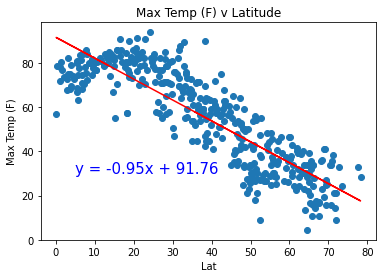

In [59]:
#passing df_nh lat values as x and df_nh max temp values as y
plt.scatter(df_nh["Lat"],df_nh["Max Temp (F)"])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_nh["Lat"], df_nh["Max Temp (F)"])
a=df_nh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_nh["Lat"],a,"r-")

plt.annotate(line_eq,(5,30),fontsize=15,color="blue")

# Title, x label, and y label for chart
plt.title("Latitude v Max Temp (F)") 
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a negative corelation between max temp of cities in nh and latitudes.
#Cities further away from equator seem to show lower values of max temp. 

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

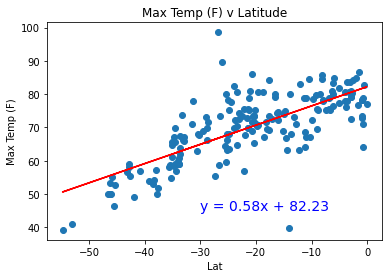

In [62]:
#passing df_sh lat values as x and df_sh max temp values as y
plt.scatter(df_sh["Lat"],df_sh["Max Temp (F)"])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_sh["Lat"], df_sh["Max Temp (F)"])
a=df_sh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_sh["Lat"],a,"r-")
 
plt.annotate(line_eq,(-30,45),fontsize=14,color="blue")

# Title, x label, and y label for chart
plt.title("Max Temp (F) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a positive corelation between max temp of cities in sh and latitudes.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

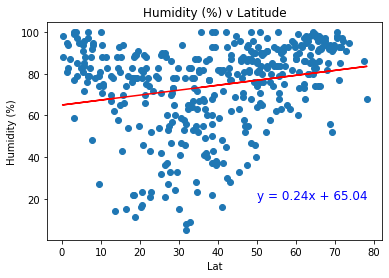

In [72]:
#passing df_nh lat values as x and df_nh humidity values as y
plt.scatter(df_nh["Lat"],df_nh["Humidity (%)"])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_nh["Lat"], df_nh["Humidity (%)"])
a=df_nh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_nh["Lat"],a,"r-")

plt.annotate(line_eq,(50,20),fontsize=12,color="blue")

# Title, x label, and y label for chart
plt.title("Humidity (%) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a positive corelation between humidity values of cities in nh and latitudes.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

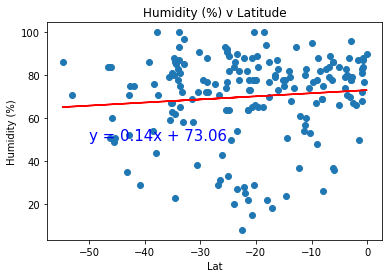

In [76]:
#passing df_sh lat values as x and df_sh humidity values as y
plt.scatter(df_sh["Lat"],df_sh["Humidity (%)"])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_sh["Lat"], df_sh["Humidity (%)"])
a=df_sh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_sh["Lat"],a,"r-")

plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")

# Title, x label, and y label for chart
plt.title("Humidity (%) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Humidity (%)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a positive corelation between humidity values of cities in sh and latitudes.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

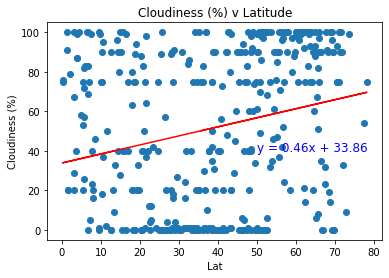

In [85]:
#passing df_nh lat values as x and df_nh cloudiness values as y
plt.scatter(df_nh["Lat"],df_nh['Cloudiness (%)'])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_nh["Lat"], df_nh['Cloudiness (%)'])
a=df_nh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_nh["Lat"],a,"r-")

plt.annotate(line_eq,(50,40),fontsize=12,color="blue")

# Title, x label, and y label for chart
plt.title("Cloudiness (%) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a positive corelation between cloudiness in cities in nh and latitudes.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

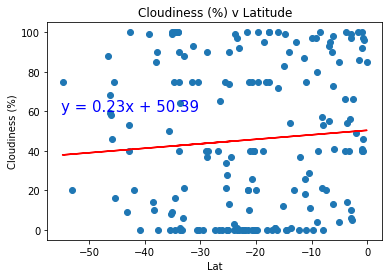

In [86]:
#passing df_sh lat values as x and df_sh cloudiness values as y
plt.scatter(df_sh["Lat"],df_sh['Cloudiness (%)'])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_sh["Lat"], df_sh['Cloudiness (%)'])
a=df_sh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_sh["Lat"],a,"r-")

plt.annotate(line_eq,(-55,60),fontsize=15,color="blue")

# Title, x label, and y label for chart
plt.title("Cloudiness (%) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a positive corelation between cloudiness in cities in sh and latitudes.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

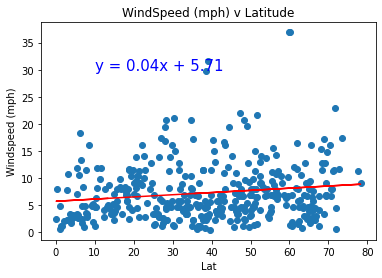

In [87]:
#passing df_nh lat values as x and df_nh windspeed values as y
plt.scatter(df_nh["Lat"],df_nh['WindSpeed (mph)'])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_nh["Lat"], df_nh['WindSpeed (mph)'])
a=df_nh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_nh["Lat"],a,"r-")

#values 20 & 40 based on x and y values 
plt.annotate(line_eq,(10,30),fontsize=15,color="blue")

# Title, x label, and y label for chart
plt.title("WindSpeed (mph) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Windspeed (mph)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a positive corelation between windpseed in cities in nh and latitudes.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

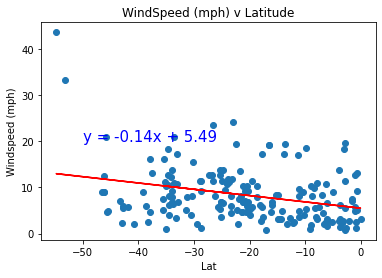

In [89]:
#passing df_sh lat values as x and df_sh windspeed values as y
plt.scatter(df_sh["Lat"],df_sh['WindSpeed (mph)'])

#linregress returns slope, intercept, rvalue, pvalue, stderror
(slope, intercept, rvalue, pvalue, stderr)=linregress(df_sh["Lat"], df_sh['WindSpeed (mph)'])
a=df_sh["Lat"]*slope+intercept

#Equation of line & rounding the values to 2 decimals
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df_sh["Lat"],a,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="blue")

# Title, x label, and y label for chart
plt.title("WindSpeed (mph) v Latitude") 
plt.xlabel("Lat")
plt.ylabel("Windspeed (mph)")
plt.show()

In [ ]:
#Based on the above scatter plot & regression line, there seems to be a negative corelation between windpseed in cities in sh and latitudes.